# **Customer Analysis**






# **GOALS**

The objective of this projectis to build a model, using historical data Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
1.	Highlight any trend in data, deep insight, novel steps that you take
2.	Highlight next steps and improvements.
3.	Apply classification and clustering machine learning algorithms and evaluate it.  
Customer analysis helps to improve its products based on its target customers from different types of customer segments.

#**Attributes**

**People**

*>ID: Customer's unique identifier

*>Year_Birth: Customer's birth year

*>Education: Customer's education level

*>Marital_Status: Customer's marital status

*>Income: Customer's yearly household income

*>Kidhome: Number of children in customer's household

*>Teenhome: Number of teenagers in customer's household

*>Dt_Customer: Date of customer's enrollment with the company

*>Recency: Number of days since customer's last purchase

*>Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

*>MntWines: Amount spent on wine in last 2 years

*>MntFruits: Amount spent on fruits in last 2 years

*>MntMeatProducts: Amount spent on meat in last 2 years

*>MntFishProducts: Amount spent on fish in last 2 years

*>MntSweetProducts: Amount spent on sweets in last 2 years

*>MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

*>NumDealsPurchases: Number of purchases made with a discount

*>AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

*>AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

*>AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

*>AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

*>AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0
otherwise

*>Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

*>NumWebPurchases: Number of purchases made through the company’s web site

*>NumCatalogPurchases: Number of purchases made using a catalogue

*>NumStorePurchases: Number of purchases made directly in stores

*>NumWebVisitsMonth: Number of visits to company’s web site in the last month

**Target**

Need to perform clustering to summarize customer segments.

# **Importing libraries**

In [1]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# **Load Data**

In [2]:
uploaded = files.upload()
customer_train = list(uploaded.keys())[0]
df = pd.read_csv(customer_train)
print(df.head())

Saving customer_train.csv to customer_train.csv
   Unnamed: 0.1  Unnamed: 0    ID  Year_Birth Education Marital_Status  \
0             0           0  5524        1957        S1         Lajang   
1             1           1  2174        1954        S1         Lajang   
2             2           2  4141        1965        S1    Bertunangan   
3             3           3  6182        1984        S1    Bertunangan   
4             4           4  5324        1981        S3        Menikah   

       Income  Kidhome  Teenhome Dt_Customer  ...  NumWebVisitsMonth  \
0  58138000.0        0         0  04-09-2012  ...                  7   
1  46344000.0        1         1  08-03-2014  ...                  5   
2  71613000.0        0         0  21-08-2013  ...                  4   
3  26646000.0        1         0  10-02-2014  ...                  6   
4  58293000.0        1         0  19-01-2014  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \

In [3]:
df = pd.read_csv('customer_train.csv')

In [4]:
df.head()


,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df_shape = df.shape

**It represents the dimensions of dataframe and it contains two value.First value is rows value and second one is columns value **

In [6]:
print(df_shape)

(1680, 31)


**Here rows value is 1680 and columns value is 3**1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i



* Here we have 3 object type datas and others are numerical.




In [8]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

# **Data Cleaning**

In [9]:
# Finding the number of unique values present in each column

df.nunique()

Unnamed: 0.1           1680
Unnamed: 0             1680
ID                     1680
Year_Birth               58
Education                 5
Marital_Status            6
Income                 1512
Kidhome                   3
Teenhome                  3
Dt_Customer             620
Recency                 100
MntCoke                 680
MntFruits               151
MntMeatProducts         485
MntFishProducts         171
MntSweetProducts        167
MntGoldProds            195
NumDealsPurchases        15
NumWebPurchases          13
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        15
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64



1.In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows so  they are not going to contribute anything in the model building. So we can drop them.




In [10]:
# Null check
null_values = df.isnull().sum()
null_values

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


*  Income column have some missing values, so we will have to fill it by either mean or median


<Axes: >

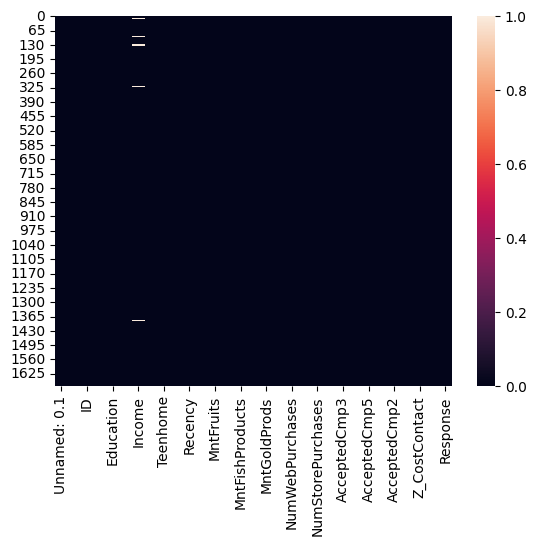

In [12]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())



* Heatmap is graphical representation of data where values are reprented by colors.  
*Useful for identifying patterns,correlations,especially in dealing with numerical data.




In [13]:
#check for NaN values in each column
nan_values = df.isna().any()

In [14]:
#print columns with NaN values

columns_with_nan = nan_values[nan_values].index.tolist()
print('columns with NaN values',columns_with_nan)

columns with NaN values ['Income']


In [15]:
# Dropping columns because they will not contribute anything in model building

df = df.drop(columns=["Z_CostContact","Z_Revenue"],axis=1)
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,10,4,7,0,0,0,0,0,0,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,1,2,5,0,0,0,0,0,0,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,2,10,4,0,0,0,0,0,0,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,0,4,6,0,0,0,0,0,0,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,3,6,5,0,0,0,0,0,0,0


# **Correlation and Data Visualization**


* Correlation is commonly used to identify relationships between variables.
* It makes predictions based on one varible with other.
* It selects relevant features for machine learning models
* Correlation doesn't imply causation.





<Axes: >

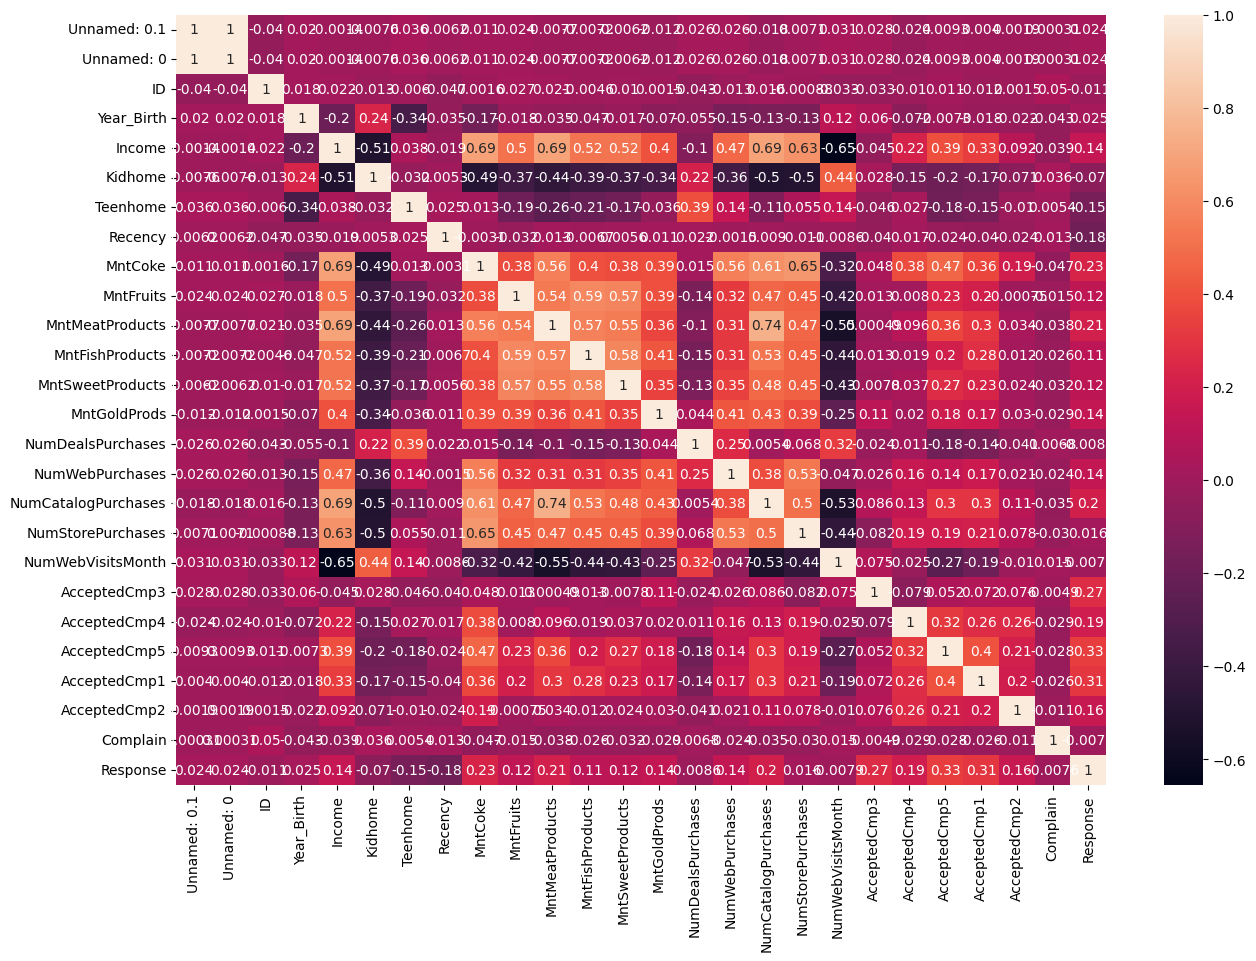

In [16]:
df_numeric = df.select_dtypes(include=["number"])
plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(), annot=True)


* Can't drop any column on the basis of correlation because no two columns are too much correlated with each other.




# **Data preprocessing**

In [17]:
# Filling the missing value in the income my mean

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

Unnamed: 0.1           False
Unnamed: 0             False
ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntCoke                False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [18]:
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,10,4,7,0,0,0,0,0,0,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,1,2,5,0,0,0,0,0,0,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,2,10,4,0,0,0,0,0,0,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,0,4,6,0,0,0,0,0,0,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,3,6,5,0,0,0,0,0,0,0


In [19]:
# Checking number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()

Marital_Status
Menikah        650
Bertunangan    438
Lajang         360
Cerai          177
Janda           52
Duda             3
Name: count, dtype: int64

In [20]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [21]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntCoke", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,0,0,5524,1957,S1,Lajang,58138000.0,04-09-2012,58,0,0,1617000,1,25
1,1,1,2174,1954,S1,Lajang,46344000.0,08-03-2014,38,0,2,27000,0,6
2,2,2,4141,1965,S1,Bertunangan,71613000.0,21-08-2013,26,0,0,776000,0,21
3,3,3,6182,1984,S1,Bertunangan,26646000.0,10-02-2014,26,0,1,53000,0,8
4,4,4,5324,1981,S3,Menikah,58293000.0,19-01-2014,94,0,1,422000,0,19


In [22]:
df['Education'].value_counts()

Education
S1     834
S3     373
S2     279
D3     159
SMA     35
Name: count, dtype: int64

In [23]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df['first_day'] = '01-01-2013'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [24]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(1680, 10)

# **Visualization**

In [25]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Education")
fig.show()


* Based on marital status with expenses,eduction is high in menikah.
* Less in duda.



In [26]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()


* Menikah is high in marital status with expenses.
* And less in duda






In [ ]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [27]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

In [28]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education",  template = 'gridon')
fig.show ()

In [29]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.7, template = "gridon")
fig.show ()


* 38.7% customers are menikah.
* less customers with 0.179% are duda.



In [30]:
fig =  px.pie (df, names = "Education", hole = 0.7, template = "plotly_dark")
fig.show ()


* 49.6% customers have S1 level education.
* 2.08% customers have SMA level education.



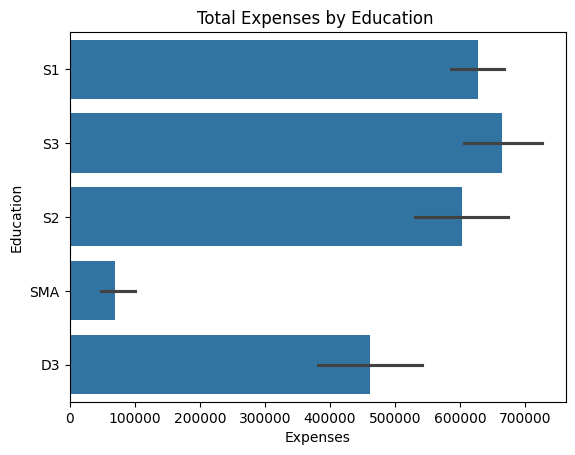

In [31]:
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expenses by Education ');


* Total expenses by education is high in S3 level.
* Total expenses by education is low in SMA level.



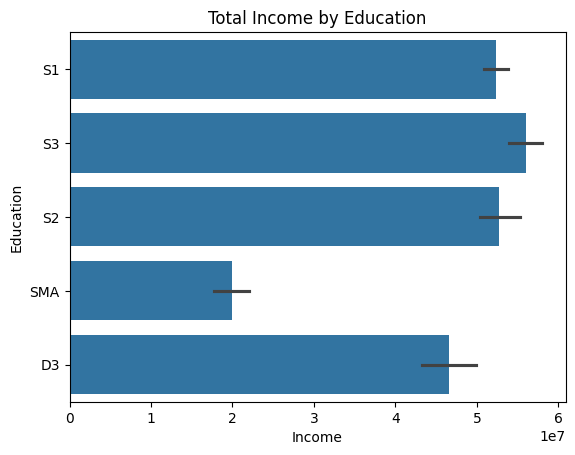

In [32]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income by Education');


* Total income by eduaction is high in S3 and low in SMA.




In [33]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,day_engaged
count,1680.000000,1680.000000,1.680000e+03,1680.000000,1.680000e+03,1680.000000,1680.000000,1680.000000
mean,839.500000,839.500000,5.201434e+07,0.952381,6.039030e+05,0.433333,14.839881,-191.196429
std,485.118542,485.118542,2.137345e+07,0.763284,6.017014e+05,0.878074,7.672958,201.201805
min,0.000000,0.000000,1.730000e+06,0.000000,5.000000e+03,0.000000,0.000000,-544.000000
25%,419.750000,419.750000,3.579075e+07,0.000000,6.900000e+04,0.000000,8.000000,-362.000000
50%,839.500000,839.500000,5.144550e+07,1.000000,3.915000e+05,0.000000,15.000000,-191.000000
75%,1259.250000,1259.250000,6.789750e+07,1.000000,1.035500e+06,1.000000,21.000000,-16.000000
max,1679.000000,1679.000000,1.623970e+08,3.000000,2.525000e+06,5.000000,44.000000,155.000000


In [34]:
df_numeric = df.select_dtypes(include=['float64','int64'])


In [35]:
correlation_matrix = df_numeric.corr()

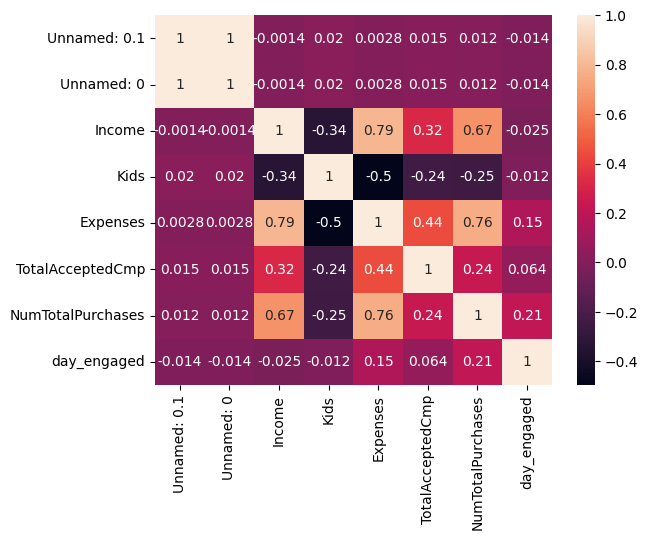

In [36]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [37]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


# **Label Encoding**

In [38]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)


* Label encoding is a technique used to convert categorical datas into numerical formats.



In [39]:
data = df.copy()

# **Standardization**

In [40]:
scaled_features = StandardScaler().fit_transform(data.values)
scaled_features_df = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)


* Standardization is a pre-processing technique used to rescale features so that they have a mean of 0 and a standard deviation of 1.
*Also known as z-score normalization.



In [41]:
scaled_features_df.head()

,Unnamed: 0.1,Unnamed: 0,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,day_engaged
0,-1.731020,-1.731020,-0.577326,0.472839,0.286593,-1.248112,1.684222,0.645544,1.324541,1.542177
1,-1.728958,-1.728958,-0.577326,0.472839,-0.265378,1.372923,-0.959072,-0.493651,-1.152426,-1.192211
2,-1.726896,-1.726896,-0.577326,-1.406213,0.917236,-1.248112,0.286102,-0.493651,0.803074,-0.202860
3,-1.724834,-1.724834,-0.577326,-1.406213,-1.187263,0.062406,-0.915848,-0.493651,-0.891692,-1.062949
4,-1.722772,-1.722772,1.420425,0.942602,0.293847,0.062406,-0.302404,-0.493651,0.542341,-0.953573


# **Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

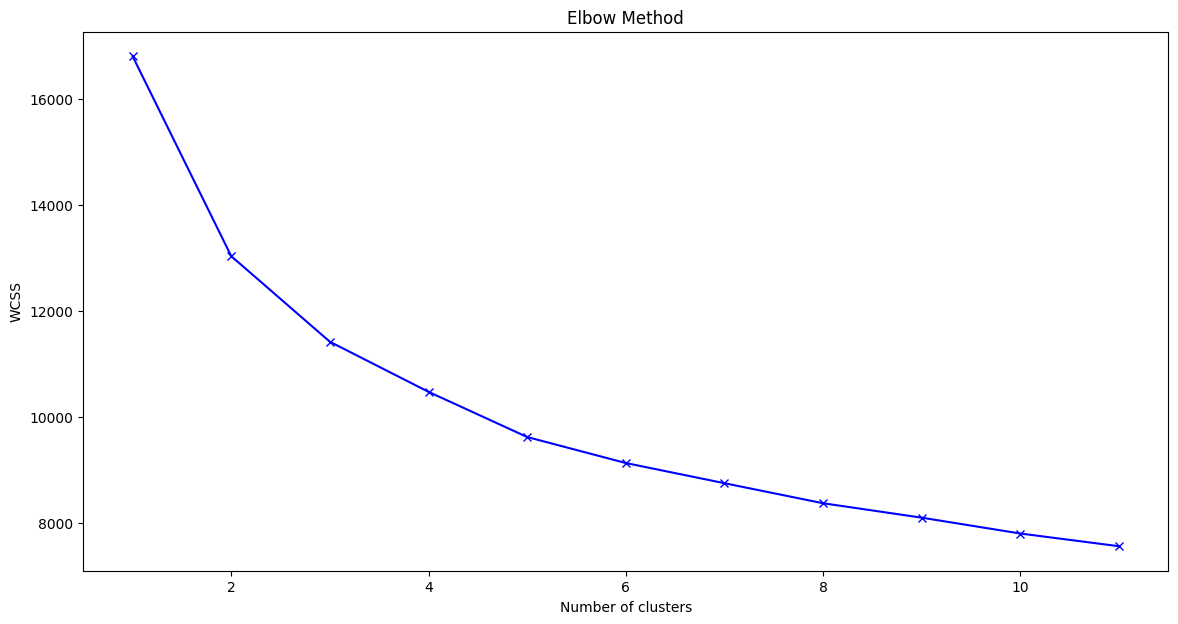

In [42]:
wcss=[]
for i in range (1,12):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=35)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,7))
plt.plot(range(1,12),wcss, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The value of K can't be clearly choose from this elbow method.

# **Silhouette Score**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

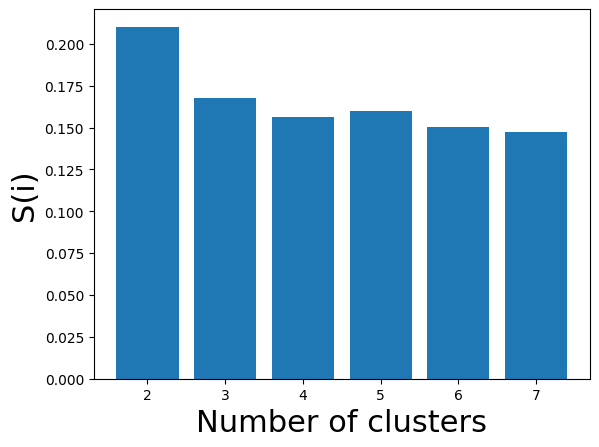

In [43]:
silhouette_scores = []
for i in range(2,8):
    m1=KMeans(n_clusters=i, random_state=35)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df)))
plt.bar(range(2,8), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 22)
plt.ylabel('S(i)', fontsize = 22)
plt.show()


* Used to determine the number of clusters.
* Score closes to 1 indicates that the object is well clustered.  
* Score around 0 indicates overlapping clusters.
* Score close to -1 indicates that the object might be assigned to the wrong cluster,





In [44]:
silhouette_scores

[0.21018999612636427,
 0.16738878123180848,
 0.1565410472586797,
 0.1600635119587741,
 0.15051450408138273,
 0.1473867121555823]

In [45]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


# **Model Building**

In [46]:
# Training a predicting by K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=35).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)

# Appending those cluster value into main dataframe

df['cluster'] = pred + 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [47]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,day_engaged,cluster
0,0,0,1,4,58138000.0,0,1617000,1,25,119,1
1,1,1,1,4,46344000.0,2,27000,0,6,-431,2
2,2,2,1,0,71613000.0,0,776000,0,21,-232,1
3,3,3,1,0,26646000.0,1,53000,0,8,-405,2
4,4,4,3,5,58293000.0,1,422000,0,19,-383,2


In [48]:
scaled_features_df.head()

,Unnamed: 0.1,Unnamed: 0,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,day_engaged
0,-1.731020,-1.731020,-0.577326,0.472839,0.286593,-1.248112,1.684222,0.645544,1.324541,1.542177
1,-1.728958,-1.728958,-0.577326,0.472839,-0.265378,1.372923,-0.959072,-0.493651,-1.152426,-1.192211
2,-1.726896,-1.726896,-0.577326,-1.406213,0.917236,-1.248112,0.286102,-0.493651,0.803074,-0.202860
3,-1.724834,-1.724834,-0.577326,-1.406213,-1.187263,0.062406,-0.915848,-0.493651,-0.891692,-1.062949
4,-1.722772,-1.722772,1.420425,0.942602,0.293847,0.062406,-0.302404,-0.493651,0.542341,-0.953573


# **Clustering**

Clustering is a versatile tool that can be applied to various types of data for different purposes.

*Used to group similar datapoints together basedon certain features of characteristics.  
* Common clustering algorithms include K-menas, hierachial clustering and DBSCAN(Density Based Spatial Clustering of Applications with Noise.)



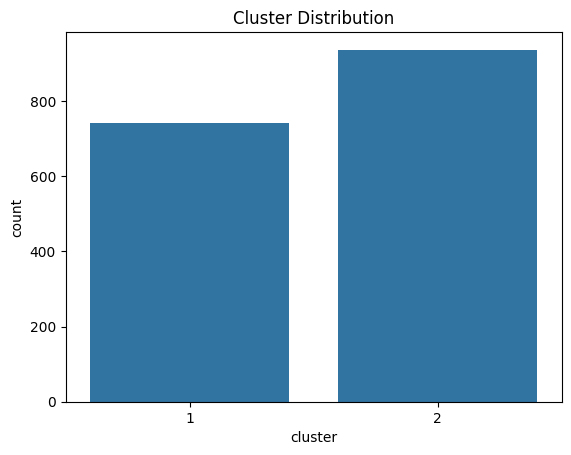

In [49]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Cluster Distribution")
plt.show()

Number of clusters required is 2

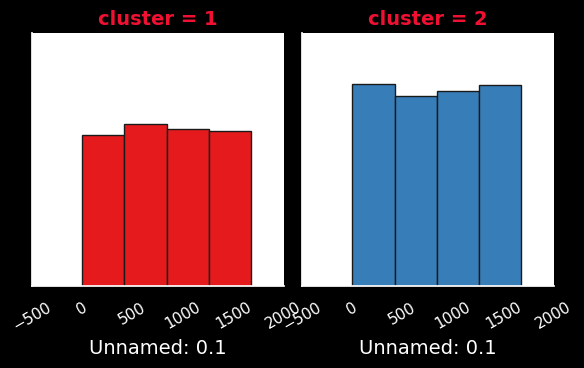

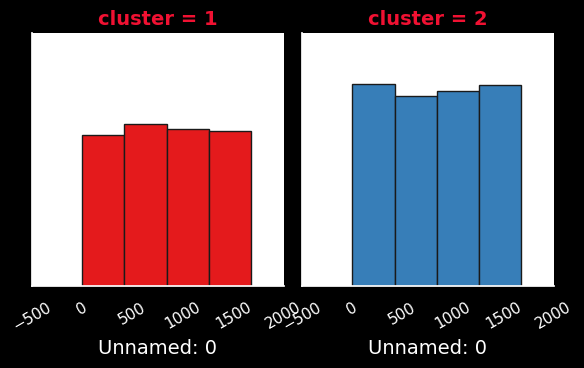

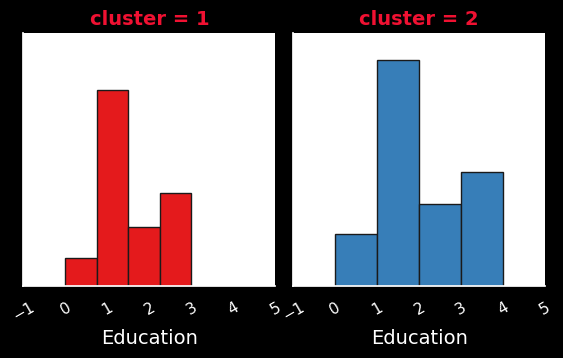

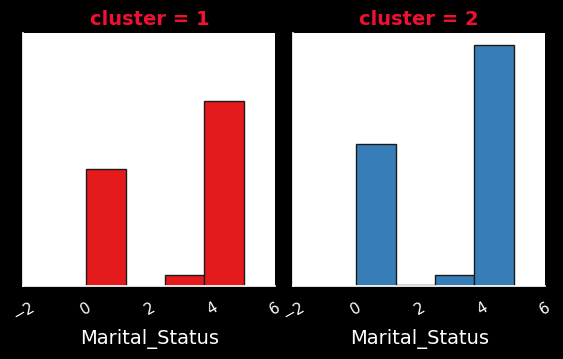

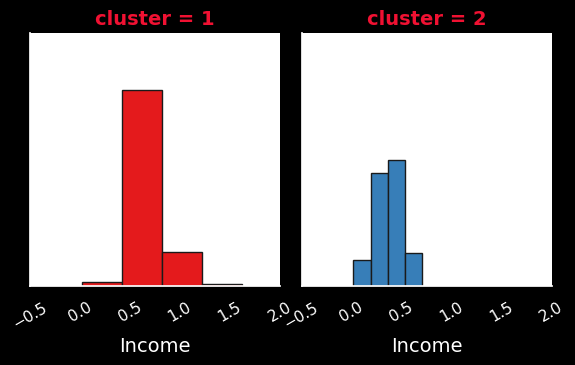

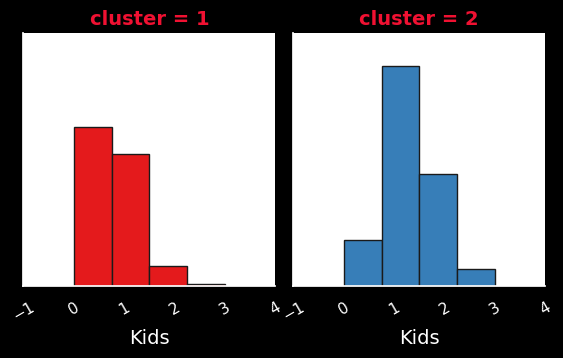

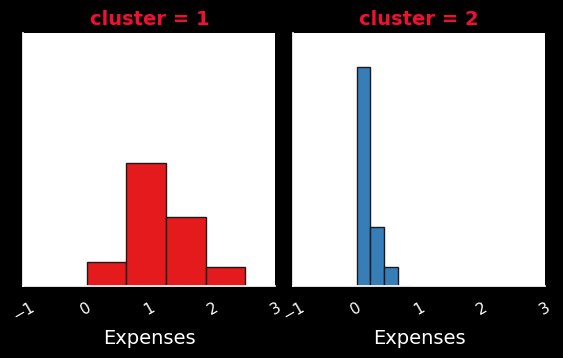

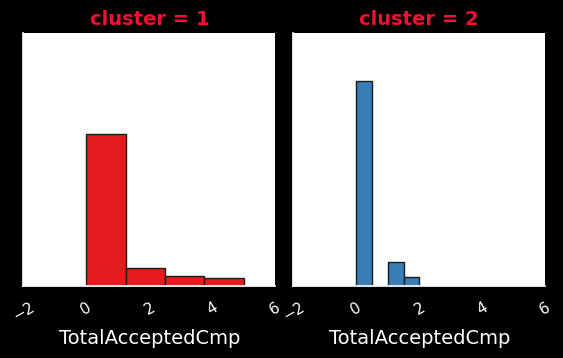

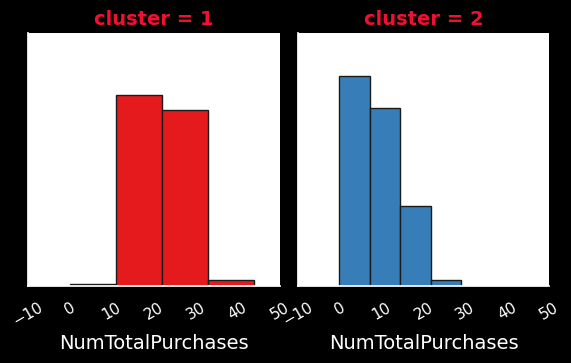

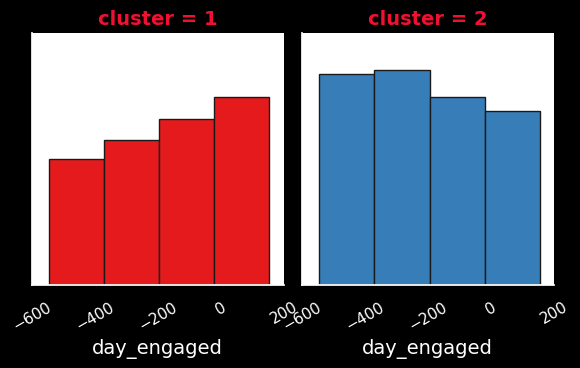

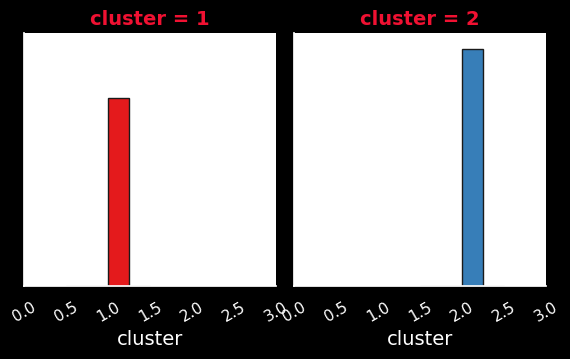

In [55]:
# Clusters interpretation
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df:
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=4, ec="k")
    diag.set_xticklabels(rotation=30, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=14, color = 'white')
    diag.set_titles(size=14, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(4)

# **Report**


---


We can divide customers into two categories.

*Highly active

*Moderately active



**Based on education**

Both highly and moderately active customers are from S3 education background.

**Based on marital status**


Highly active customers are lees when comapared to moderately active customers.

**Based on income**

Highly active customers have more income background than moderately active customers.

**Based on kids**

Moderately active customers have more children when compared to highly active customers.

**Based on expenses**

Highly active customers spend more money than moderately active customers.

**Based on TotalAcceptedCmp**

More in highly active customers.

**Based on Numtotalpurchases**

Both customers are comaparatively same.

**Based on day engaged**

Moderately active customers are more loyal than highly active customers since they spend long period of time with company.